In [7]:
import sys
from itables import init_notebook_mode
from sklearn.preprocessing import MinMaxScaler

sys.path.append("./../src/")
#init_notebook_mode(all_interactive=True)

import data_loader as dl
import preprocessing as pp
import model as m
import run
import visualizations

## Prepare models

In [2]:
uebb = dl.load_uebb_data(from_raw=False)

In [3]:
uk = False
shifts = [1,6,144]
non_nan_percentage = 70
col_to_be_lagged = ["air_density","sonic_wind_speed"]
val_ratio = 0.2
scalers = [MinMaxScaler(),MinMaxScaler(),MinMaxScaler()]

## Run models

In [4]:
models = run.pipeline(uebb, uk, shifts, non_nan_percentage, 
                      col_to_be_lagged, val_ratio, scalers)

/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Finished training model 10min horizon


/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Finished training model 1 hour horizon


/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Finished training model 1 day horizon


## Evaluate results

In [5]:
visualizations.plot_metrics(models)

| Model Name     |     RMSE |     MAE |
|:---------------|---------:|--------:|
| 10min horizon  |  57.8108 |  38.075 |
| 1 hour horizon | 114.262  |  81.237 |
| 1 day horizon  | 194.821  | 153.888 |


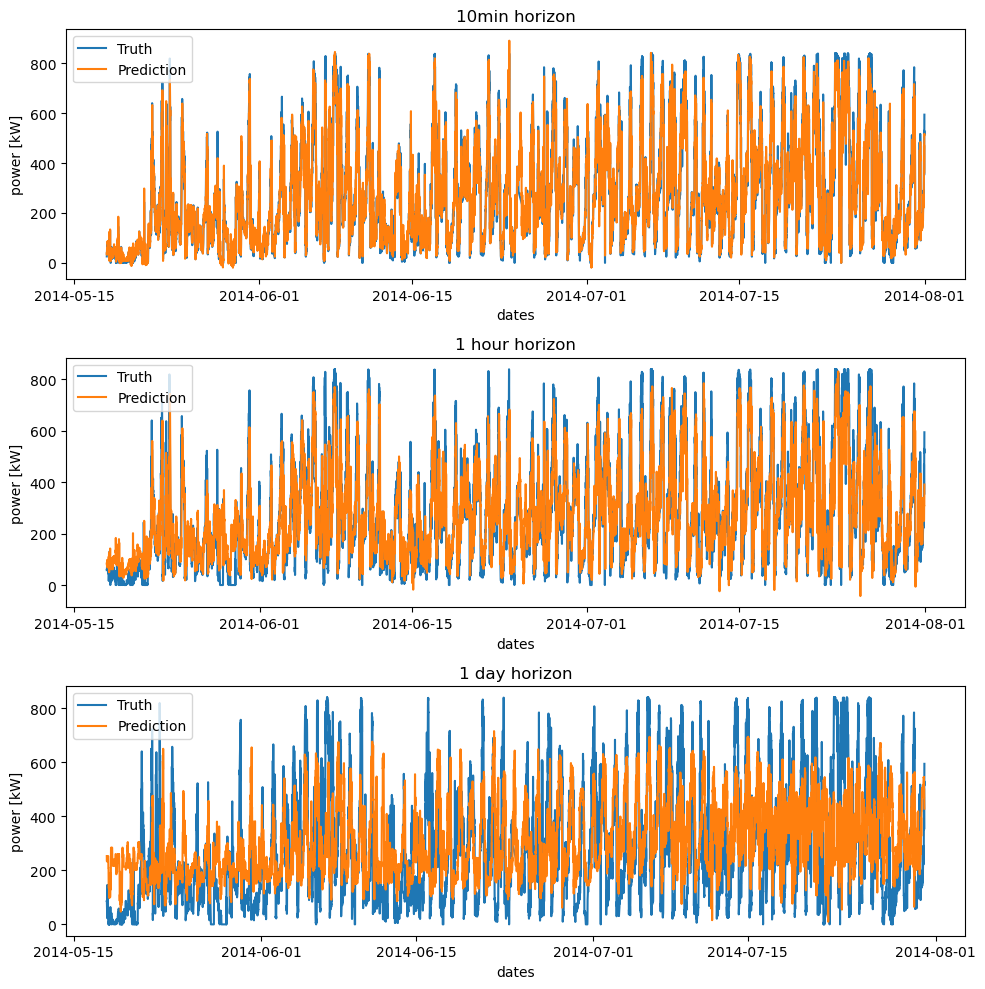

In [6]:
visualizations.plot_models(models)